In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import numpy as np
from lid_driven_cavity import postprocessing, states

In [41]:
np.set_printoptions(linewidth=2000)

In [42]:
N = 11  # number of primal cells in each direction

# Mock phi
x = np.linspace(0.0, 1.0, N)
y = np.linspace(0.0, 1.0, N)
xx, yy = np.meshgrid(x, y)
phi_n_interior = xx + yy
phi_n = states.State(phi_n_interior, Nx=N, Ny=N)
phi_n.pad_boundaries()
phi_n_matrix = phi_n.get_matrix()
phi_n_matrix[0, :] = phi_n_matrix[1, :]  # top row
phi_n_matrix[-1, :] = phi_n_matrix[-2, :]  # bottom row
phi_n_matrix[:, 0] = phi_n_matrix[:, 1]  # left column
phi_n_matrix[:, -1] = phi_n_matrix[:, -2]  # right column
print(phi_n)
print(phi_n.get_matrix().shape)

# Mock u_n
u_n_interior = np.ones((N, N-1))*0.8
u_n = states.State(u_n_interior, Nx=N-1, Ny=N)
u_n.pad_boundaries()
u_n_matrix = u_n.get_matrix()
u_n_matrix[0, :] = 1.0
u_n = states.State(u_n_matrix, Nx=u_n.Nx, Ny=u_n.Ny)
print(u_n)
print(u_n.get_matrix().shape)

# Mock v_n
v_n_interior = np.ones((N-1, N))*0.2
v_n = states.State(v_n_interior, Nx=N, Ny=N-1)
v_n.pad_boundaries()
print(v_n)
print(v_n.get_matrix().shape)

[[0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1. ]
 [0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1. ]
 [0.3 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.3]
 [0.6 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.6]
 [0.9 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 1.9]
 [1.2 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.2]
 [1.5 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.5]
 [1.8 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.8]
 [2.1 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.1]
 [2.4 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.4]
 [2.7 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.7]
 [3.  3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4. ]
 [3.  3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4. ]]
(13, 13)
[[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [0.  0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0. ]
 [0.  0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0. ]
 [0.  0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0. ]
 [0.  0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0. ]
 [0.  0.8 0.8 0.8 0.

[[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
 [0.         0.09090909 0.18181818 0.27272727 0.3636363

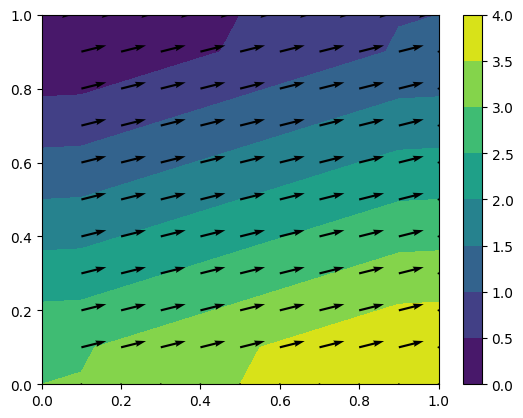

In [43]:
postprocessing.plot_streamlines(u_n, v_n, phi_n)